In [1]:
import pandas as pd
health_care_diabetes = pd.read_csv('data/health care diabetes.csv')
health_care_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
health_care_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# посчитать долю больных диабетом (правильно)
health_care_diabetes['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [4]:
# правильно
blood_pressure_with_diabetes = health_care_diabetes[health_care_diabetes['Outcome'] == 1]['BloodPressure'].mean()
blood_pressure_without_diabetes = health_care_diabetes[health_care_diabetes['Outcome'] == 0]['BloodPressure'].mean()
print(abs(blood_pressure_with_diabetes - blood_pressure_without_diabetes))

2.640626865671649


In [5]:
cor_matrix = health_care_diabetes.corr()
cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

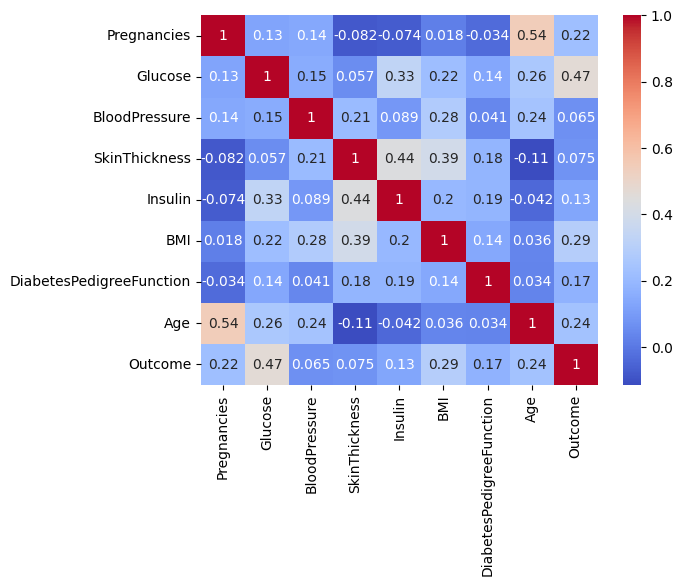

In [6]:
import seaborn as sns
import numpy as np
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')


Самые неинформативные признаки это Age и Pregnancies, тк между ними самый большой коэф корреляции (правильно)

In [7]:
# рассчитаем взаимную информацию между каждым признаком и целевой переменной 
# чем больше показатель, тем больше взаимосвязь 
from sklearn.feature_selection import mutual_info_classif

copy_data = health_care_diabetes.copy()

y = copy_data['Outcome']
X = copy_data.drop('Outcome', axis=1)
mi = mutual_info_classif(X, y)
print(mi)
# у Glucose максимальный показатель (правильно)

[0.02855312 0.11149141 0.04251619 0.         0.04144795 0.08823033
 0.00846495 0.07913279]


In [9]:
# пятое задание неверно
from sklearn.model_selection import train_test_split # разделение на обучающую и тестовую выборки
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data_copy = health_care_diabetes.copy()
y = np.array(data_copy['Outcome'])
X = np.array(data_copy.drop('Outcome', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [18]:
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()), #для стандартизации признаков 
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'knn__metric': ['minkowski', 'euclidean', 'cosine']
    }

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='accuracy') # accuracy, recall, f1, precision
grid_search.fit(X_train, y_train)
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучшая точность: {grid_search.best_score_}')

# cosine 7 (неверно) - попробовать в кавычках - все равно неверно

Лучшие параметры: {'knn__metric': 'cosine', 'knn__n_neighbors': 7}
Лучшая точность: 0.7639077702252433


In [10]:
# номер 6
from sklearn.metrics import classification_report, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski')
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

print('Метрики модели:\n', classification_report(y_test, y_pred))
y_prob = best_knn.predict_proba(X_test_scaled)[:,1]
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC ROC: {auc_roc:.4f}')

# 0.75 0.72 0.71 0.72 0.79

Метрики модели:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       168
           1       0.60      0.52      0.56        86

    accuracy                           0.72       254
   macro avg       0.69      0.67      0.68       254
weighted avg       0.71      0.72      0.72       254

AUC ROC: 0.7735


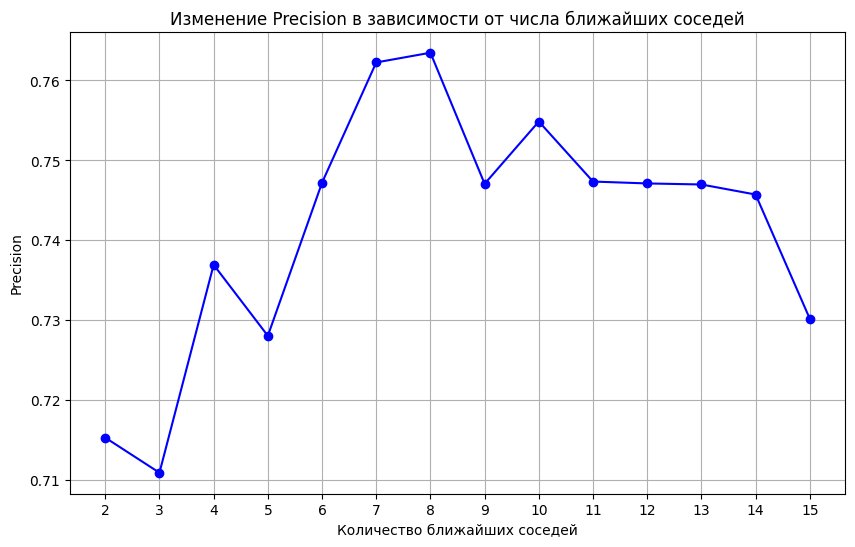

[np.float64(0.7153280053533548), np.float64(0.7109418950989875), np.float64(0.7369451156859637), np.float64(0.7280626099248695), np.float64(0.7472082751145119), np.float64(0.7622488183930145), np.float64(0.7634642557673976), np.float64(0.7470701035492324), np.float64(0.7548621373259055), np.float64(0.7473535841948405), np.float64(0.7471188798851658), np.float64(0.746987220954963), np.float64(0.7457298244346154), np.float64(0.7301910410418531)]


In [11]:
# номер 7
import matplotlib.pyplot as plt

precisions = []
for k in range(2, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    precision_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='precision_macro')
    precisions.append(np.mean(precision_scores))
    
plt.figure(figsize=(10,6))
plt.plot(range(2, 16), precisions, marker='o', linestyle='-', color='b')
plt.title('Изменение Precision в зависимости от числа ближайших соседей')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('Precision')
plt.xticks(range(2,16))
plt.grid(True)
plt.show()
print(precisions)

# макс пресижн при k=8

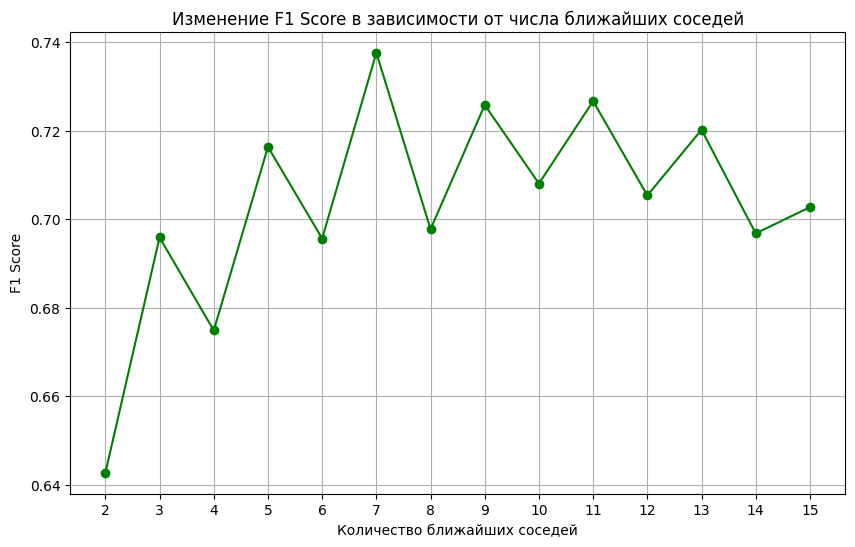

[np.float64(0.6426848924888172), np.float64(0.6958748285273816), np.float64(0.6748459054908967), np.float64(0.7163475680033333), np.float64(0.6956334231333957), np.float64(0.7376328986832432), np.float64(0.697729197287139), np.float64(0.7258237576390683), np.float64(0.7080573764411536), np.float64(0.7266913348661745), np.float64(0.7053670332380262), np.float64(0.7202165068841634), np.float64(0.6967821305844112), np.float64(0.7027191082169316)]


In [31]:
# номер 8
f1_scores = []
for k in range(2, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    f1_score_values = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1_macro')
    f1_scores.append(np.mean(f1_score_values))
    
plt.figure(figsize=(10,6))
plt.plot(range(2, 16), f1_scores, marker='o', linestyle='-', color='g')
plt.title('Изменение F1 Score в зависимости от числа ближайших соседей')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('F1 Score')
plt.xticks(range(2,16))
plt.grid(True)
plt.show()
print(f1_scores)

# макс ф1 скор при k=7

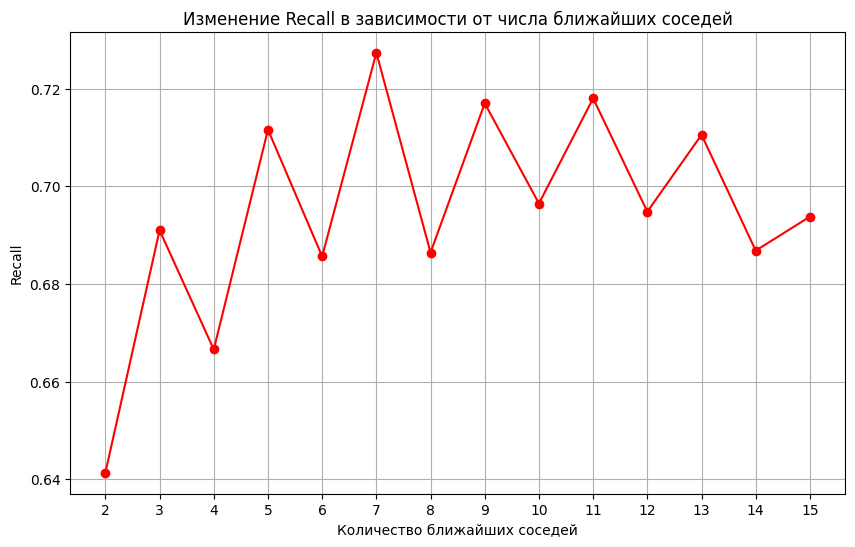

[np.float64(0.6413144148218775), np.float64(0.6910064745885641), np.float64(0.6665737650812278), np.float64(0.7116133093745034), np.float64(0.6856428341502968), np.float64(0.7273867150732822), np.float64(0.6864374890494294), np.float64(0.7170259472498278), np.float64(0.6964834916327454), np.float64(0.7180407340855102), np.float64(0.6948135041418624), np.float64(0.710565212430884), np.float64(0.6868303853378481), np.float64(0.6937961706618423)]


In [32]:
# номер 9
recall_scores = []
for k in range(2, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    recall_values = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='recall_macro')
    recall_scores.append(np.mean(recall_values))
    
plt.figure(figsize=(10,6))
plt.plot(range(2, 16), recall_scores, marker='o', linestyle='-', color='r')
plt.title('Изменение Recall в зависимости от числа ближайших соседей')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('Recall')
plt.xticks(range(2,16))
plt.grid(True)
plt.show()
print(recall_scores)

# макс рекол при k=7

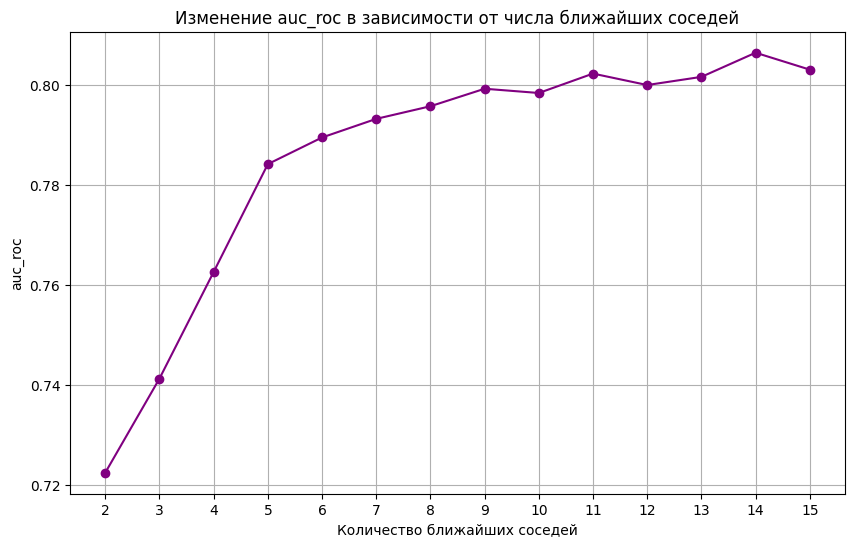

[np.float64(0.7224018794914318), np.float64(0.7412401546729905), np.float64(0.7625842599723197), np.float64(0.784176595184058), np.float64(0.7895068915591303), np.float64(0.7932338376368228), np.float64(0.7957631817706445), np.float64(0.7992639518758922), np.float64(0.7984128972934943), np.float64(0.8022964959532123), np.float64(0.8000063666108442), np.float64(0.8016402257073898), np.float64(0.80647413016816), np.float64(0.8030868894674865)]


In [34]:
# номер 10

auc_roc_scores = []
for k in range(2, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    auc_roc = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc_ovr')
    auc_roc_scores.append(np.mean(auc_roc))
    
plt.figure(figsize=(10,6))
plt.plot(range(2, 16), auc_roc_scores, marker='o', linestyle='-', color='purple')
plt.title('Изменение auc_roc в зависимости от числа ближайших соседей')
plt.xlabel('Количество ближайших соседей')
plt.ylabel('auc_roc')
plt.xticks(range(2,16))
plt.grid(True)
plt.show()
print(auc_roc_scores)

# макс аук рок при k=14